# 利用网络爬虫实现广州地铁线路图

In [1]:
import requests
#利用高德地铁提供的json爬取地铁站坐标
#url = 'http://map.amap.com/service/subway?_1564543665121&srhdata=4401_info_guangzhou.json'
url = 'http://map.amap.com/service/subway?_1564543665120&srhdata=4401_drw_guangzhou.json'

In [2]:
response = requests.get(url)

In [3]:
response.text

'{"s":"广州市地铁","o":"1000,670","l":[{"f":[{"li":"440100023050","c":["438 975","438 939","437 905","437 874","437 843","437 809","436 787","436 782","437 779","437 777","438 776","439 776","441 775","450 775","471 775","506 775","593 776","680 776","740 776","803 776","861 776","937 777","1001 777","1042 777","1073 777","1078 777","1082 776","1086 775","1089 774","1092 771","1093 768","1094 765","1094 762","1094 713","1094 672","1094 668","1092 665","1089 662","1085 660","1080 659","1076 659","1001 659"]},{"li":"440100023049","c":["1001 665","1076 665","1079 665","1083 666","1086 667","1087 669","1088 670","1088 672","1088 713","1088 761","1088 764","1088 766","1087 768","1085 769","1084 770","1081 771","1077 771","1073 771","1042 771","1001 771","937 771","861 770","803 770","740 770","680 770","593 770","506 769","471 769","450 769","441 769","437 770","434 772","432 775","431 778","430 782","430 787","431 809","431 843","431 874","431 905","432 939","432 975"]}],"lo":"0","li":"44010002

In [4]:
#由于json数据格式不统一，利用正则表达式多次匹配。问题：是否可以一条表达式匹配所有？
import re
#"sl":"113.231978,23.065437","sid":"440100023043015","sp":"xi ?","udsi":"440100023049017;440100023050002","n":"西塱"
#"sl":"113.232498,23.078878","sid":"440100023049016","sp":"keng kou","udsi":"440100023050003;440100023049016","n":"坑口"
#"sl":"113.326126,23.185225","sid":"440100023031010","sp":"jing xi nan fang yi yuan","udsi":"440100023032007;440100023031010","n":"京溪南方医院"
#"sl":"113.314249,23.119843","sid":"440100023037013","sp":"wu yang ?","udsi":"440100023038014;440100023037013","n":"五羊邨"
#"sl":"113.155426,23.042607","sid":"440100023043016","sp":"? gang","udsi":"440100023044016;440100023043016","n":"礌岗"
#sl":"113.305659,23.396197","sid":"440100023031016","sp":"ji chang bei (2 hao hang zhan lou )","udsi":"440100023032016;440100023031016","n":"机场北(2号航站楼)
patten1 = re.compile(r'"(\d+\.\d+),(\d+\.\d+)","sid":"\d+","sp":"\w+\s+\w+","udsi":"\d+;\d+","n":"(\w+)')
patten2 = re.compile(r'"(\d+\.\d+),(\d+\.\d+)","sid":"\d+","sp":"\w+\s+\?","udsi":"\d+;\d+","n":"(\w+)')
patten3 = re.compile(r'"(\d+\.\d+),(\d+\.\d+)","sid":"\d+","sp":"\w+\s\w+\s\w+","udsi":"\d+;\d+","n":"(\w+)')
patten4 = re.compile(r'"(\d+\.\d+),(\d+\.\d+)","sid":"\d+","sp":"\w+\s\w+\s\w+\s\w+","udsi":"\d+;\d+","n":"(\w+)')
patten5 = re.compile(r'"(\d+\.\d+),(\d+\.\d+)","sid":"\d+","sp":"\w+\s\w+\s\w+\s\w+\s\w+","udsi":"\d+;\d+","n":"(\w+)')
patten6 = re.compile(r'"(\d+\.\d+),(\d+\.\d+)","sid":"\d+","sp":"\w+\s\w+\s\w+\s\w+\s\w+\s\w+","udsi":"\d+;\d+","n":"(\w+)')
patten7 = re.compile(r'"(\d+\.\d+),(\d+\.\d+)","sid":"\d+","sp":"\w+\s+\w+\s+\?","udsi":"\d+;\d+","n":"(\w+)')
patten8 = re.compile(r'"(\d+\.\d+),(\d+\.\d+)","sid":"\d+","sp":"\?\s\w+","udsi":"\d+;\d+","n":"(\w+)')
patten9 = re.compile(r'"(\d+\.\d+),(\d+\.\d+)","sid":"\d+","sp":"\w+\s+\w+\s+\w+\s+\(\d+\s+\w+\s+\w+\s+\w+\s+\w+\s+\)","udsi":"\d+;\d+","n":"(\w+\(\d+\w+\))')
patten = patten9.findall(response.text) + patten8.findall(response.text) + patten1.findall(response.text) + patten2.findall(response.text) + patten3.findall(response.text) + patten4.findall(response.text) + patten5.findall(response.text) + patten6.findall(response.text)+ patten7.findall(response.text)
patten

[('113.305659', '23.396197', '机场北(2号航站楼)'),
 ('113.303048', '23.386627', '机场南(1号航站楼)'),
 ('113.208440', '23.113796', '滘口'),
 ('113.155426', '23.042607', '礌岗'),
 ('113.232498', '23.078878', '坑口'),
 ('113.235703', '23.098592', '芳村'),
 ('113.239856', '23.110524', '黄沙'),
 ('113.308877', '23.128137', '杨箕'),
 ('113.277964', '22.994136', '石壁'),
 ('113.286394', '23.013047', '会江'),
 ('113.293154', '23.032929', '南浦'),
 ('113.298665', '23.042896', '洛溪'),
 ('113.297367', '23.064799', '南洲'),
 ('113.276885', '23.090654', '昌岗'),
 ('113.280697', '23.198580', '萧岗'),
 ('113.283451', '23.211301', '江夏'),
 ('113.287376', '23.221645', '黄边'),
 ('113.361726', '22.949743', '市桥'),
 ('113.321744', '23.017761', '大石'),
 ('113.321677', '23.077974', '大塘'),
 ('113.320331', '23.096197', '客村'),
 ('113.339601', '23.134880', '岗顶'),
 ('113.345349', '23.140306', '华师'),
 ('113.351812', '23.152833', '五山'),
 ('113.295504', '23.355162', '高增'),
 ('113.295995', '23.335224', '人和'),
 ('113.300834', '23.288736', '龙归'),
 ('113.30629

In [5]:
#数据整理
station_localtion = {}
for line in patten:
    log,lat,station = line
    log=float(log)
    lat=float(lat)
    station_localtion[station] = (log,lat)
    
station_localtion

{'机场北(2号航站楼)': (113.305659, 23.396197),
 '机场南(1号航站楼)': (113.303048, 23.386627),
 '滘口': (113.20844, 23.113796),
 '礌岗': (113.155426, 23.042607),
 '坑口': (113.232498, 23.078878),
 '芳村': (113.235703, 23.098592),
 '黄沙': (113.239856, 23.110524),
 '杨箕': (113.308877, 23.128137),
 '石壁': (113.277964, 22.994136),
 '会江': (113.286394, 23.013047),
 '南浦': (113.293154, 23.032929),
 '洛溪': (113.298665, 23.042896),
 '南洲': (113.297367, 23.064799),
 '昌岗': (113.276885, 23.090654),
 '萧岗': (113.280697, 23.19858),
 '江夏': (113.283451, 23.211301),
 '黄边': (113.287376, 23.221645),
 '市桥': (113.361726, 22.949743),
 '大石': (113.321744, 23.017761),
 '大塘': (113.321677, 23.077974),
 '客村': (113.320331, 23.096197),
 '岗顶': (113.339601, 23.13488),
 '华师': (113.345349, 23.140306),
 '五山': (113.351812, 23.152833),
 '高增': (113.295504, 23.355162),
 '人和': (113.295995, 23.335224),
 '龙归': (113.300834, 23.288736),
 '永泰': (113.306295, 23.220226),
 '同和': (113.326264, 23.19706),
 '燕塘': (113.327132, 23.15998),
 '黄村': (113.407274, 23.131814

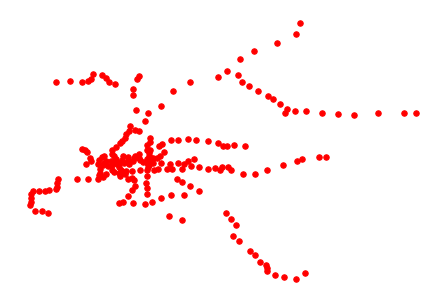

In [6]:
#根据坐标绘制站点分布
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.family'] = 'sans-serif'

station_graph=nx.Graph()
station_graph.add_nodes_from(list(station_localtion.keys()))
nx.draw(station_graph,station_localtion,with_labels=False,node_size=30,node_color='red')

In [7]:
import requests
#爬取广州本地宝网站，获取每条线路的具体站点名称

url = 'http://gz.bendibao.com/ditie/'
response = requests.get(url)
response.text

'\r\n\r\n\r\n\r\n<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\r\n<html xmlns="http://www.w3.org/1999/xhtml">\r\n<head>\r\n<meta http-equiv="Content-Type" content="text/html; charset=gb2312" />\r\n<meta http-equiv="X-UA-Compatible" content="IE=7" />    \r\n<title>广州地铁_广州地铁查询_最新广州地铁线路图_广州地铁运营时间_广州地铁规划图-广州本地宝</title>\r\n<meta content="广州地铁,广州地铁查询,最新广州地铁线路图,广州地铁运营时间,广州地铁规划图" name="Keywords" />\r\n<meta content="广州本地宝交通频道为你带来最新广州地铁线路图，广州地铁运营时间，广州地铁规划图的详细信息" name="Description" />\r\n<meta name="renderer" content="webkit">\r\n<link rel="stylesheet" href="http://jtapi.bendibao.com/ditie/css/cssreset.min.css" />\r\n<link rel="stylesheet" href="http://jtapi.bendibao.com/ditie/css/metro.min.css" />\r\n<link rel="stylesheet" href="http://jtapi.bendibao.com/ditie/css/linecolor.min.css" />\r\n<link rel="stylesheet" href="http://jtapi.bendibao.com/ditie/css/top.css" />\r\n\r\n<meta http-equiv="mobile-agent" content="format=x

In [8]:
#正则表达式提取地铁各条线路
#<strong><a href="/ditie/xl_213.shtml" target="_blank">广州地铁1号线</a></strong>
patten = re.compile(r'<strong><a href="(/ditie/xl_\d+.shtml)" target="_blank">(\w+)')
#patten2 = re.compile(r'<a href="(http://jt.gz.bendibao.com/z/gzdt/\d+/)" target="_blank">(\w+)')

subway_line = patten.findall(response.text)
subway_line

[('/ditie/xl_213.shtml', '广州地铁1号线'),
 ('/ditie/xl_214.shtml', '广州地铁2号线'),
 ('/ditie/xl_215.shtml', '广州地铁3号线'),
 ('/ditie/xl_216.shtml', '广州地铁3号线北延段'),
 ('/ditie/xl_217.shtml', '广州地铁4号线'),
 ('/ditie/xl_218.shtml', '广州地铁5号线'),
 ('/ditie/xl_219.shtml', '广州地铁6号线'),
 ('/ditie/xl_349.shtml', '广州地铁7号线'),
 ('/ditie/xl_220.shtml', '广州地铁8号线'),
 ('/ditie/xl_351.shtml', '广州地铁9号线'),
 ('/ditie/xl_221.shtml', '广州广佛地铁'),
 ('/ditie/xl_222.shtml', '广州地铁APM线'),
 ('/ditie/xl_352.shtml', '广州地铁13号线一期'),
 ('/ditie/xl_353.shtml', '广州地铁14号线一期'),
 ('/ditie/xl_354.shtml', '广州地铁14号线支线'),
 ('/ditie/xl_590.shtml', '广州地铁21号线一期')]

In [9]:
#转换list，非必需，可以忽略。
subway = []
for line in subway_line:
    line=list(line)
    subway.append(line)
subway

[['/ditie/xl_213.shtml', '广州地铁1号线'],
 ['/ditie/xl_214.shtml', '广州地铁2号线'],
 ['/ditie/xl_215.shtml', '广州地铁3号线'],
 ['/ditie/xl_216.shtml', '广州地铁3号线北延段'],
 ['/ditie/xl_217.shtml', '广州地铁4号线'],
 ['/ditie/xl_218.shtml', '广州地铁5号线'],
 ['/ditie/xl_219.shtml', '广州地铁6号线'],
 ['/ditie/xl_349.shtml', '广州地铁7号线'],
 ['/ditie/xl_220.shtml', '广州地铁8号线'],
 ['/ditie/xl_351.shtml', '广州地铁9号线'],
 ['/ditie/xl_221.shtml', '广州广佛地铁'],
 ['/ditie/xl_222.shtml', '广州地铁APM线'],
 ['/ditie/xl_352.shtml', '广州地铁13号线一期'],
 ['/ditie/xl_353.shtml', '广州地铁14号线一期'],
 ['/ditie/xl_354.shtml', '广州地铁14号线支线'],
 ['/ditie/xl_590.shtml', '广州地铁21号线一期']]

In [10]:
#正则表达式提取各条线路的具体站点名称
#<a href="/ditie/zd_guangzhoudongzhan.shtml" target="_blank">广州东站
patten_s = re.compile(r'<a href="/ditie/zd_\w+.shtml" target="_blank">(\w+)</a>')

In [11]:
stations = []
stations_line = {}
for urls in subway:#将每条线路的站点按不同线路分开存放
    url = 'http://gz.bendibao.com'+ urls[0]
    response_s = requests.get(url)
    tmp = patten_s.findall(response_s.text)
    stations_line[urls[1]] = (tmp)
    stations.append(tmp)
    
stations_line #核对每条线路的站点
#station_localtion
stations

[['广州东站',
  '体育中心',
  '体育西路',
  '杨箕',
  '东山口',
  '烈士陵园',
  '农讲所',
  '公园前',
  '西门口',
  '陈家祠',
  '长寿路',
  '黄沙',
  '芳村',
  '花地湾',
  '坑口',
  '西朗'],
 ['广州南站',
  '石壁',
  '会江',
  '南浦',
  '洛溪',
  '南洲',
  '东晓南',
  '江泰路',
  '昌岗',
  '江南西',
  '市二宫',
  '海珠广场',
  '公园前',
  '纪念堂',
  '越秀公园',
  '广州火车站',
  '三元里',
  '飞翔公园',
  '白云公园',
  '白云文化广场',
  '萧岗',
  '江夏',
  '黄边',
  '嘉禾望岗'],
 ['天河客运站',
  '五山',
  '华师',
  '岗顶',
  '石牌桥',
  '体育西路',
  '珠江新城',
  '广州塔',
  '客村',
  '大塘',
  '沥滘',
  '厦滘',
  '大石',
  '汉溪长隆',
  '市桥',
  '番禺广场'],
 ['机场南',
  '人和',
  '龙归',
  '嘉禾望岗',
  '白云大道北',
  '永泰',
  '同和',
  '京溪南方医院',
  '梅花园',
  '燕塘',
  '广州东站',
  '林和西',
  '体育西路'],
 ['黄村',
  '车陂',
  '车陂南',
  '万胜围',
  '官洲',
  '大学城北',
  '大学城南',
  '新造',
  '石碁',
  '海傍',
  '低涌',
  '东涌',
  '黄阁汽车城',
  '黄阁',
  '蕉门',
  '金洲'],
 ['滘口',
  '坦尾',
  '中山八',
  '西场',
  '西村',
  '广州火车站',
  '小北',
  '淘金',
  '区庄',
  '动物园',
  '杨箕',
  '五羊邨',
  '珠江新城',
  '猎德',
  '潭村',
  '员村',
  '科韵路',
  '车陂南',
  '东圃',
  '三溪',
  '鱼珠',
  '大沙地',
  '大沙东',
  '文冲'],
 ['浔峰岗',
  '横沙',
  '沙贝',
  '河沙'

In [12]:
#由于爬取不同的网站数据，某些坐标的站点名称与线路的站点名称不统一，需整理统一
#西朗-西塱，机场南-机场南(1号航站楼)，清埗-清布，莲塘村-莲塘，温涌-沙村，复昌桥-新沙，知识城北-红卫，邓村-赤草，马头庄-新南
#枫下村-枫下，康大-汤村，知识城南-何棠下，白鳝塘-清塘
station_name=['西朗','机场南','清埗','莲塘村','温涌','复昌桥','知识城北','邓村','马头庄',
              '枫下村','康大','知识城南','白鳝塘']  #原地铁站点名称

coodinate_name=['西塱','机场南(1号航站楼)','清布','莲塘','沙村','新沙','红卫','赤草','新南',
                '枫下','汤村','何棠下','清塘']  #坐标站点名称

for station in stations:
    for i,s in enumerate(station_name):
        if s in station:
            station[station.index(s)]=coodinate_name[i]  #修改原地铁站点名称为坐标站点名称
          
stations

[['广州东站',
  '体育中心',
  '体育西路',
  '杨箕',
  '东山口',
  '烈士陵园',
  '农讲所',
  '公园前',
  '西门口',
  '陈家祠',
  '长寿路',
  '黄沙',
  '芳村',
  '花地湾',
  '坑口',
  '西塱'],
 ['广州南站',
  '石壁',
  '会江',
  '南浦',
  '洛溪',
  '南洲',
  '东晓南',
  '江泰路',
  '昌岗',
  '江南西',
  '市二宫',
  '海珠广场',
  '公园前',
  '纪念堂',
  '越秀公园',
  '广州火车站',
  '三元里',
  '飞翔公园',
  '白云公园',
  '白云文化广场',
  '萧岗',
  '江夏',
  '黄边',
  '嘉禾望岗'],
 ['天河客运站',
  '五山',
  '华师',
  '岗顶',
  '石牌桥',
  '体育西路',
  '珠江新城',
  '广州塔',
  '客村',
  '大塘',
  '沥滘',
  '厦滘',
  '大石',
  '汉溪长隆',
  '市桥',
  '番禺广场'],
 ['机场南(1号航站楼)',
  '人和',
  '龙归',
  '嘉禾望岗',
  '白云大道北',
  '永泰',
  '同和',
  '京溪南方医院',
  '梅花园',
  '燕塘',
  '广州东站',
  '林和西',
  '体育西路'],
 ['黄村',
  '车陂',
  '车陂南',
  '万胜围',
  '官洲',
  '大学城北',
  '大学城南',
  '新造',
  '石碁',
  '海傍',
  '低涌',
  '东涌',
  '黄阁汽车城',
  '黄阁',
  '蕉门',
  '金洲'],
 ['滘口',
  '坦尾',
  '中山八',
  '西场',
  '西村',
  '广州火车站',
  '小北',
  '淘金',
  '区庄',
  '动物园',
  '杨箕',
  '五羊邨',
  '珠江新城',
  '猎德',
  '潭村',
  '员村',
  '科韵路',
  '车陂南',
  '东圃',
  '三溪',
  '鱼珠',
  '大沙地',
  '大沙东',
  '文冲'],
 ['浔峰岗',
  '横沙',
  '沙贝',

In [13]:
#将相邻站点相互连接
from collections import defaultdict
station_connection = defaultdict(list)
for s1 in station_localtion:
    for s2 in stations:
        if s1 in s2:
            if s2.index(s1) != len(s2)-1:
                station_connection[s1].append(s2[s2.index(s1)+1])
            if s2.index(s1) != 0:
                station_connection[s1].append(s2[s2.index(s1)-1])
        
station_connection

defaultdict(list,
            {'机场南(1号航站楼)': ['人和'],
             '滘口': ['坦尾'],
             '礌岗': ['千灯湖', '南桂路'],
             '坑口': ['西塱', '花地湾'],
             '芳村': ['花地湾', '黄沙'],
             '黄沙': ['芳村', '长寿路', '文化公园', '如意坊'],
             '杨箕': ['东山口', '体育西路', '五羊邨', '动物园'],
             '石壁': ['会江', '广州南站', '谢村', '广州南站'],
             '会江': ['南浦', '石壁'],
             '南浦': ['洛溪', '会江'],
             '洛溪': ['南洲', '南浦'],
             '南洲': ['东晓南', '洛溪'],
             '昌岗': ['江南西', '江泰路', '晓港', '宝岗大道'],
             '萧岗': ['江夏', '白云文化广场'],
             '江夏': ['黄边', '萧岗'],
             '黄边': ['嘉禾望岗', '江夏'],
             '市桥': ['番禺广场', '汉溪长隆'],
             '大石': ['汉溪长隆', '厦滘'],
             '大塘': ['沥滘', '客村'],
             '客村': ['大塘', '广州塔', '赤岗', '鹭江'],
             '岗顶': ['石牌桥', '华师'],
             '华师': ['岗顶', '五山'],
             '五山': ['华师', '天河客运站'],
             '高增': ['清塘'],
             '人和': ['龙归', '机场南(1号航站楼)'],
             '龙归': ['嘉禾望岗', '人和'],
             '永泰': ['同和',

c:\users\13569\appdata\local\programs\python\python37\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


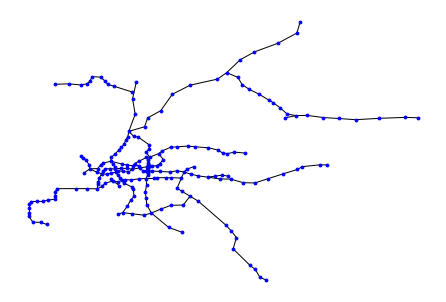

In [14]:
#广州地铁线路图
station_graph = nx.Graph(station_connection)
#为方便查看，不显示站点名称，with_labels=False。
nx.draw(station_graph,station_localtion,with_labels=False,node_size=8,node_color='blue') 

#问题：是否有方法可以把图进行放大和缩小？

# 广度搜索优先（BFS）和深度搜索优先（DFS），由扩展顺序决定。

In [15]:
def less_transfer_first(pathes):  #换乘最少优先
    return sorted(pathes,key=len)

def more_transfer_first(pathes):  #最多换乘
    return sorted(pathes,key=len,reverse=True)

#最短距离优先，可接近于最短时间优先
import math
def geo_distance(origin, destination):#计算两个经纬度之间的距离,Haversine公式
    
    log1,lat1 = origin
    log2,lat2 = destination
    radius = 6371  # 地球平均半径 km

    dlat = math.radians(lat2 - lat1)
    dlog = math.radians(log2 - log1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlog / 2) * math.sin(dlog / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d    

def get_geo_distance(station1, station2):
    return geo_distance(station_localtion[station1], station_localtion[station1])  #取得两个站点间距离

def shorter_distance_first(pathes):  ##距离最短，有时候可接近于时间最短
    if len(pathes) <= 1: return pathes
    
    def get_path_distnace(path):
        distance = 0
        for i,station in enumerate(path[:-1]):
            distance += get_geo_distance(station, path[i+1])
            
        return distance

    return sorted(pathes, key=get_path_distnace)

In [16]:
#BFS广度搜索优先，扩展已发现的点。
def bfs(start,destination,graph,sort_policy):
    pathes = [[start]]
    visited = set()
    
    while pathes:
        path = pathes.pop(0)  #优先扩展已发现的旧的点
        frontier = path[-1]
        
        if frontier in visited: continue
        
        successors = graph[frontier]
        
        for station in successors:
            new_path = path + [station]
            pathes.append(new_path)
            #print (pathes)
            #print (visited)
            if station == destination: return new_path
        
        visited.add(frontier)
        pathes = sort_policy(pathes)  #加入排序函数对搜索策略进行控制


#DFS深度搜索优先，扩展新发现的点。
def dfs(start,destination,graph):
    pathes = [[start]]
    visited = set()
    
    while pathes:
        path = pathes.pop(-1)  #优先扩展新发现的点
        frontier = path[-1]
        
        if frontier in visited: continue
        
        successors = graph[frontier]
        
        for station in successors:
            new_path = path + [station]
            pathes.append(new_path)
            #print (pathes)
            #print (visited)
            if station == destination: return new_path
       
        
        visited.add(frontier)
         



def pretty_print(stations):
    print('🚗->'.join(stations) + '\n')


pretty_print(bfs('五山','广州火车站',station_connection,sort_policy=less_transfer_first))  #换乘最少
pretty_print(bfs('五山','广州火车站',station_connection,sort_policy=more_transfer_first))  #换乘最多
pretty_print(bfs('五山','广州火车站',station_connection,sort_policy=shorter_distance_first))  #距离最短
pretty_print(dfs('五山','广州火车站',station_connection))

pretty_print(bfs('岗顶','千灯湖',station_connection,sort_policy=less_transfer_first))
pretty_print(bfs('岗顶','千灯湖',station_connection,sort_policy=more_transfer_first))
pretty_print(bfs('岗顶','千灯湖',station_connection,sort_policy=shorter_distance_first))
pretty_print(dfs('岗顶','千灯湖',station_connection))

pretty_print(bfs('天河客运站','广州火车站',station_connection,sort_policy=shorter_distance_first))
pretty_print(dfs('天河客运站','广州火车站',station_connection))

五山🚗->天河客运站🚗->燕塘🚗->天平架🚗->沙河顶🚗->黄花岗🚗->区庄🚗->淘金🚗->小北🚗->广州火车站

五山🚗->华师🚗->岗顶🚗->石牌桥🚗->体育西路🚗->杨箕🚗->东山口🚗->烈士陵园🚗->农讲所🚗->公园前🚗->西门口🚗->陈家祠🚗->长寿路🚗->黄沙🚗->芳村🚗->花地湾🚗->坑口🚗->西塱🚗->鹤洞🚗->沙涌🚗->沙园🚗->宝岗大道🚗->昌岗🚗->江泰路🚗->东晓南🚗->南洲🚗->洛溪🚗->南浦🚗->会江🚗->石壁🚗->谢村🚗->钟村🚗->汉溪长隆🚗->大石🚗->厦滘🚗->沥滘🚗->大塘🚗->客村🚗->广州塔🚗->海心沙🚗->大剧院🚗->花城大道🚗->妇儿中心🚗->黄埔大道🚗->天河南🚗->体育中心南🚗->林和西🚗->广州东站🚗->燕塘🚗->梅花园🚗->京溪南方医院🚗->同和🚗->永泰🚗->白云大道北🚗->嘉禾望岗🚗->黄边🚗->江夏🚗->萧岗🚗->白云文化广场🚗->白云公园🚗->飞翔公园🚗->三元里🚗->广州火车站

五山🚗->天河客运站🚗->燕塘🚗->天平架🚗->沙河顶🚗->黄花岗🚗->区庄🚗->淘金🚗->小北🚗->广州火车站

五山🚗->天河客运站🚗->燕塘🚗->天平架🚗->沙河顶🚗->黄花岗🚗->区庄🚗->东山口🚗->东湖🚗->团一大广场🚗->北京路🚗->海珠广场🚗->一德路🚗->文化公园🚗->黄沙🚗->如意坊🚗->坦尾🚗->中山八🚗->西场🚗->西村🚗->广州火车站

岗顶🚗->石牌桥🚗->体育西路🚗->珠江新城🚗->广州塔🚗->客村🚗->鹭江🚗->中大🚗->晓港🚗->昌岗🚗->宝岗大道🚗->沙园🚗->沙涌🚗->鹤洞🚗->西塱🚗->菊树🚗->龙溪🚗->金融高新区🚗->千灯湖

岗顶🚗->石牌桥🚗->体育西路🚗->杨箕🚗->东山口🚗->烈士陵园🚗->农讲所🚗->公园前🚗->西门口🚗->陈家祠🚗->长寿路🚗->黄沙🚗->芳村🚗->花地湾🚗->坑口🚗->西塱🚗->菊树🚗->龙溪🚗->金融高新区🚗->千灯湖

岗顶🚗->石牌桥🚗->体育西路🚗->珠江新城🚗->广州塔🚗->客村🚗->鹭江🚗->中大🚗->晓港🚗->昌岗🚗->宝岗大道🚗->沙园🚗->沙涌🚗->鹤洞🚗->西塱🚗->菊树🚗->龙溪🚗->金融高新区🚗->千灯湖

岗顶🚗->华师🚗->五山🚗->天河客运站🚗->燕塘🚗->天平架🚗->沙河顶🚗->黄花岗🚗->区庄🚗->东山口🚗->东湖🚗->

# 复现Boston房价预测代码（导数部分留在第三次作业）

In [39]:
import numpy
from sklearn.datasets import load_boston
data = load_boston()
data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [40]:
X,y = data['data'],data['target']
X[0]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [41]:
y[0]

24.0

In [42]:
data['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [43]:
data['DESCR']

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [44]:
X[:,0],len(X[:,0])

(array([6.32000e-03, 2.73100e-02, 2.72900e-02, 3.23700e-02, 6.90500e-02,
        2.98500e-02, 8.82900e-02, 1.44550e-01, 2.11240e-01, 1.70040e-01,
        2.24890e-01, 1.17470e-01, 9.37800e-02, 6.29760e-01, 6.37960e-01,
        6.27390e-01, 1.05393e+00, 7.84200e-01, 8.02710e-01, 7.25800e-01,
        1.25179e+00, 8.52040e-01, 1.23247e+00, 9.88430e-01, 7.50260e-01,
        8.40540e-01, 6.71910e-01, 9.55770e-01, 7.72990e-01, 1.00245e+00,
        1.13081e+00, 1.35472e+00, 1.38799e+00, 1.15172e+00, 1.61282e+00,
        6.41700e-02, 9.74400e-02, 8.01400e-02, 1.75050e-01, 2.76300e-02,
        3.35900e-02, 1.27440e-01, 1.41500e-01, 1.59360e-01, 1.22690e-01,
        1.71420e-01, 1.88360e-01, 2.29270e-01, 2.53870e-01, 2.19770e-01,
        8.87300e-02, 4.33700e-02, 5.36000e-02, 4.98100e-02, 1.36000e-02,
        1.31100e-02, 2.05500e-02, 1.43200e-02, 1.54450e-01, 1.03280e-01,
        1.49320e-01, 1.71710e-01, 1.10270e-01, 1.26500e-01, 1.95100e-02,
        3.58400e-02, 4.37900e-02, 5.78900e-02, 1.35

In [45]:
y[:],len(y[:])

(array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
        19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
        20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
        23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
        33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
        21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
        20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
        23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
        15.6, 11.8, 13.8, 15.6, 14.6, 

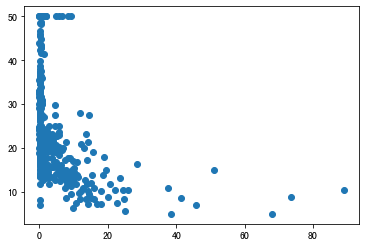

In [46]:
%matplotlib inline
plt.scatter(X[:,0],y) #'CRIM'犯罪率与价格关系，犯罪率越低，价格越高

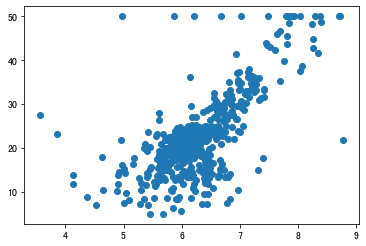

In [47]:
plt.scatter(X[:,5],y) #'RM'平均房间数量与价格关系，平均房间数越多，价格越高

c:\users\13569\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\13569\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


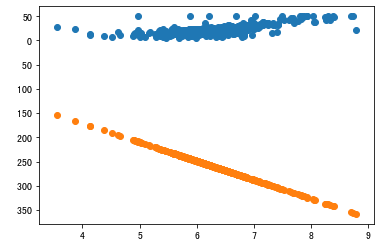

In [194]:
import random

# 斜截式直线方程f(x)=kx+b
def price(rm,k,b): #rm相当于X
    return k * rm + b

# k，b随机赋值
k = random.randint(-100,100)
b = random.randint(-100,100)

rm = X[:,5]

price_random_k_and_b = [price(r,k,b) for  r in rm]

plt.scatter(X[:, 5], y) #实际数值
plt.scatter(rm,price_random_k_and_b) #预测数值

# loss
$$\hat{y}$$为预测数值（可写成y_hat），
$$y$$为实际数值。

$$loss = \frac{1}{n} \sum{(y_i - \hat{y_i})^2}$$

In [195]:
# 因为随机数k,b,每次生成的直线与数据的位置不一样，需要对生成的直线进行评价。
#预测好坏的值称为损失值，通过loss损失值对直线进行评价。
def loss(y,y_hat):
    return sum((i - j)**2 for i,j in zip(list(y),list(y_hat))) / len(list(y))

loss([1,1,1,1,3],[1,2,1,3,4]),loss([1,1,1,1,3],[1,1,1,2,2])  #损失值测试

(1.2, 0.4)

# First-Method:Random generation:get best k and best b

In [196]:
rm = X[:,5]

trying_times = 100
min_loss = float('inf')
best_k,best_b = None,None

for i in range(trying_times):
    k = random.randint(-100,100)
    b = random.randint(-100,100)
    price_random_k_and_b = [price(r,k,b) for  r in rm]
    
    current_loss = loss(y,price_random_k_and_b)
    if current_loss < min_loss:
        min_loss = current_loss
        best_k,best_b = k,b
        print('第{}次，best_k:{},best_b:{},and the loss is:{}'.format(i,best_k,best_b,min_loss))

第0次，best_k:-68,best_b:52,and the loss is:161287.35965954154
第1次，best_k:26,best_b:15,and the loss is:24479.020197177833
第2次，best_k:13,best_b:-23,and the loss is:1359.1701109545459
第16次，best_k:19,best_b:-91,and the loss is:126.38756594268777
第76次，best_k:-2,best_b:38,and the loss is:112.7265679604743
第84次，best_k:5,best_b:-10,and the loss is:53.12256951581024


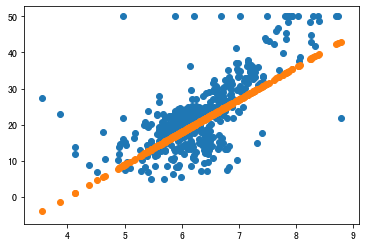

In [197]:
k = 9
b = -36
price_random_k_and_b = [price(r,k,b) for  r in rm]

plt.scatter(X[:, 5], y) #实际数值
plt.scatter(rm,price_random_k_and_b) #预测数值

In [152]:
random.random()*20000-10000  #random随机生成-10000到10000的数值

7830.99922327145

In [198]:
rm = X[:,5]

trying_times = 10000 #尝试次数越大，loss越接近于零，但是时间消耗会很大。

min_loss = float('inf')
best_k,best_b = None,None

for i in range(trying_times):
    k = random.random()*200-100
    b = random.random()*200-100
    price_random_k_and_b = [price(r,k,b) for  r in rm]
    
    current_loss = loss(y,price_random_k_and_b)
    if current_loss < min_loss:
        min_loss = current_loss
        best_k,best_b = k,b
        print('第{}次，best_k:{},best_b:{},and the loss is:{}'.format(i,best_k,best_b,min_loss))

第0次，best_k:-28.57727304173345,best_b:-51.56740149080312,and the loss is:65105.73255534332
第1次，best_k:22.856564775576132,best_b:-32.61060695124726,and the loss is:7969.369051088411
第10次，best_k:0.2607845597225662,best_b:71.32967881793135,and the loss is:2625.884792014741
第33次，best_k:-1.898324232561663,best_b:19.70370733919036,and the loss is:321.0604522839488
第134次，best_k:3.0635943725997095,best_b:13.155851787355061,and the loss is:159.11356569799807
第478次，best_k:10.467770797454762,best_b:-38.659511693215066,and the loss is:65.62239023958166
第583次，best_k:6.128756315727827,best_b:-13.727895804174679,and the loss is:53.04723159882569
第855次，best_k:7.3966976497801085,best_b:-24.492797736211386,and the loss is:45.32518899359055
第4705次，best_k:9.541340029351147,best_b:-38.03650196036108,and the loss is:44.06220399365396


# Second-Method:Direction Adjusting（找到对的方向，监督让方向朝着好的结果变化，即监督学习）

In [203]:
rm = X[:,5]

trying_times = 10000 #尝试次数越大，loss越接近于零，但是时间消耗会很大。

min_loss = float('inf')

best_k = random.random()*200-100
best_b = random.random()*200-100

direction = [ 
    (+1,-1), #第一个元素 +1 表示 k 的变化方向，第二个元素 -1 表示 b 的变化方向。+1 / -1 表示 增大 / 减小。
    (+1,+1),
    (-1,+1),
    (-1,-1),
]

next_direction = random.choice(direction) #随机选择 k,b的一组作为方向

scalar = 0.1
for i in range(trying_times):
    
    k_direction,b_direction = next_direction
     
    current_k,current_b = best_k + k_direction * scalar,best_b + b_direction * scalar  # k,b的值加上方向
    
    price_k_and_b = [price(r,current_k,current_b) for  r in rm]
    
    current_loss = loss(y,price_k_and_b)
    
    if current_loss < min_loss: #如果得到的结果向好的方向发展
        min_loss = current_loss
        best_k,best_b = current_k,current_b
        
        next_direction = next_direction #下一个方向仍然采用上一个好的方向继续发展
        print('第{}次，best_k:{},best_b:{},and the loss is:{}'.format(i,best_k,best_b,min_loss))
    
    else: #如果得到的结果开始变坏
        next_direction = random.choice(direction) #下一个方向将重新随机选择一个方向
        

第0次，best_k:-87.87349639980074,best_b:-16.120382385889123,and the loss is:353846.9226230857
第2次，best_k:-87.77349639980075,best_b:-16.220382385889124,and the loss is:353213.10652169556
第3次，best_k:-87.67349639980075,best_b:-16.320382385889125,and the loss is:352579.8588214211
第4次，best_k:-87.57349639980076,best_b:-16.420382385889127,and the loss is:351947.179522264
第5次，best_k:-87.47349639980077,best_b:-16.52038238588913,and the loss is:351315.068624223
第6次，best_k:-87.37349639980077,best_b:-16.62038238588913,and the loss is:350683.52612729877
第7次，best_k:-87.27349639980078,best_b:-16.72038238588913,and the loss is:350052.55203149095
第8次，best_k:-87.17349639980078,best_b:-16.820382385889133,and the loss is:349422.14633679984
第9次，best_k:-87.07349639980079,best_b:-16.920382385889134,and the loss is:348792.30904322467
第10次，best_k:-86.9734963998008,best_b:-17.020382385889135,and the loss is:348163.04015076644
第11次，best_k:-86.8734963998008,best_b:-17.120382385889137,and the loss is:347534.339659424

第437次，best_k:-44.273496399801815,best_b:-59.72038238588974,and the loss is:131404.58029292626
第438次，best_k:-44.17349639980181,best_b:-59.820382385889744,and the loss is:131018.58707832223
第439次，best_k:-44.07349639980181,best_b:-59.920382385889745,and the loss is:130633.16226483478
第440次，best_k:-43.97349639980181,best_b:-60.02038238588975,and the loss is:130248.30585246353
第441次，best_k:-43.87349639980181,best_b:-60.12038238588975,and the loss is:129864.01784120883
第442次，best_k:-43.77349639980181,best_b:-60.22038238588975,and the loss is:129480.29823107076
第443次，best_k:-43.673496399801806,best_b:-60.32038238588975,and the loss is:129097.14702204903
第444次，best_k:-43.573496399801805,best_b:-60.42038238588975,and the loss is:128714.5642141439
第445次，best_k:-43.4734963998018,best_b:-60.520382385889754,and the loss is:128332.54980735529
第446次，best_k:-43.3734963998018,best_b:-60.620382385889755,and the loss is:127951.1038016832
第447次，best_k:-43.2734963998018,best_b:-60.72038238588976,and the lo

第863次，best_k:-1.6734963998014543,best_b:-102.32038238588763,and the loss is:18425.981941144943
第864次，best_k:-1.5734963998014542,best_b:-102.42038238588762,and the loss is:18282.127602162313
第865次，best_k:-1.473496399801454,best_b:-102.52038238588761,and the loss is:18138.84166429614
第866次，best_k:-1.373496399801454,best_b:-102.62038238588761,and the loss is:17996.12412754645
第867次，best_k:-1.273496399801454,best_b:-102.7203823858876,and the loss is:17853.97499191327
第868次，best_k:-1.1734963998014538,best_b:-102.8203823858876,and the loss is:17712.394257396572
第869次，best_k:-1.0734963998014537,best_b:-102.92038238588759,and the loss is:17571.381923996327
第870次，best_k:-0.9734963998014537,best_b:-103.02038238588759,and the loss is:17430.937991712588
第871次，best_k:-0.8734963998014538,best_b:-103.12038238588758,and the loss is:17291.062460545334
第872次，best_k:-0.7734963998014538,best_b:-103.22038238588758,and the loss is:17151.75533049454
第873次，best_k:-0.6734963998014538,best_b:-103.32038238588757